<a href="https://colab.research.google.com/github/Robbysaidiii/Machine_Learning/blob/main/ML_2_Regresi_Lanjutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2 Regresi Lanjutan

Sebelum mulai:
*   Student yang pakai Colab, silahkan "Save a Copy in Drive" dahulu
*   Student yang pakai Jupyter Notebook, silahkan download code ini dahulu



# Import Library

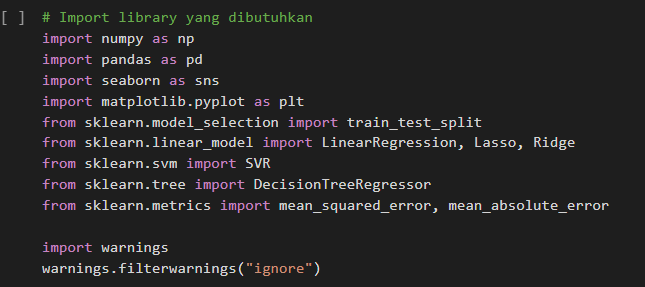

In [4]:
# Tulis di sini
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')


# Load Dataset
https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv

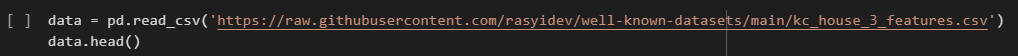

In [5]:
# Tulis di sini
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


Dataset memiliki 3 feature:
- sqft_living
- sqft_living15
- sqft_above

dan sebuah label, yakni price.

# 1. Analisis Korelasi

Lakukan analisis korelasi terhadap dataset.

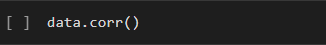

In [6]:
# Tulis di sini
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


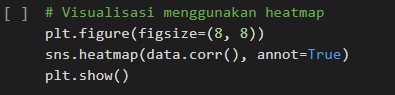

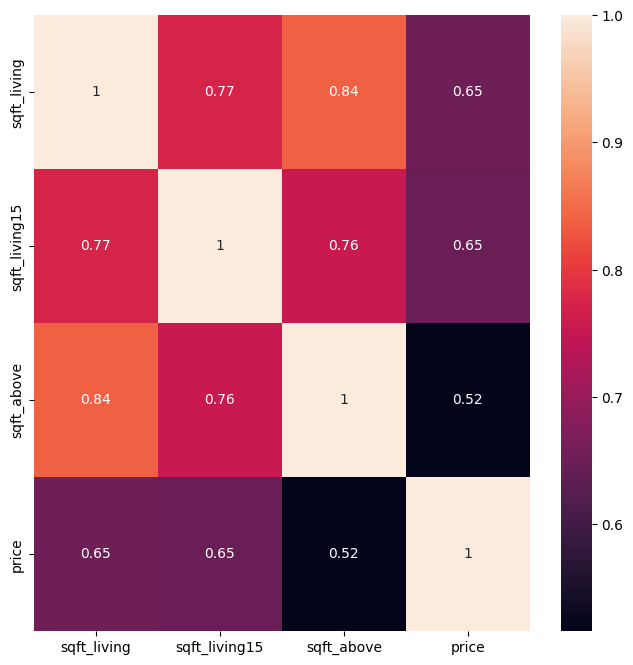

In [8]:
# Tulis di sini
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

Hasil analisis korelasi menunjukkan bahwa:
- semua feature berkorelasi positif terhadap price
- feature sqft_living dan sqft_living15 memiliki koefisien korelasi tertinggi

# Split Dataset

Split dataset menjadi:
- training data (X_train dan y_train) 80%
- testing data (X_test dan y_test) 20%

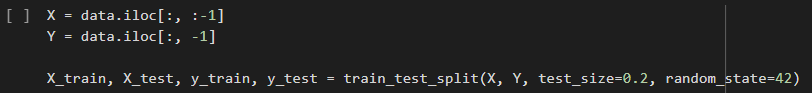

In [30]:
# Tulis di sini
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

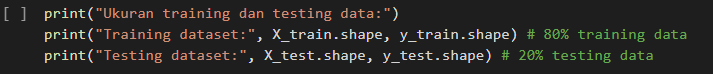

In [32]:
# Tulis di sini
print("ukuran training dan testing data:")
print("Training dataset:",x_train.shape,y_train.shape )
print("Testing dataset:",x_test.shape,y_test.shape)

ukuran training dan testing data:
Training dataset: (80, 3) (80,)
Testing dataset: (20, 3) (20,)


# 2. Modeling

Pada program ini, kita akan melatih lebih dari satu model regresi, antara lain:
- Regresi Linier
- Regresi Lasso
- Regresi Ridge
- Support Vector Regressor (SVR)
- Decision Tree Regressor (DTR)

Latih semua model menggunakan training data (X_train dan y_train)


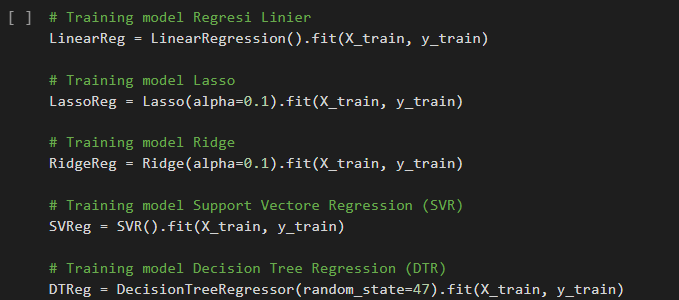

In [13]:
# Tulis di sini
Linear= LinearRegression().fit(x_train,y_train)
Lasso= Lasso(alpha=0.1).fit(x_train,y_train)
Ridge= Ridge(alpha=0.1).fit(x_train,y_train)
SVR= SVR().fit(x_train,y_train)
DTR= DecisionTreeRegressor(random_state=47).fit(x_train,y_train)

**alpha=0.1** dan **random_state=47** disebut sebagai hyperparameter.

Umumnya, setiap algoritma AI memiliki hyperparameter yang bisa kita setel (tuning) sesuai keinginan.

Setelan hyperparameter yang tepat mampu meningkatkan performa model.

Kunjungi dokumentasi library untuk mempelajari tentang hyperparameter:
- [Regresi Linier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regresi Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Regresi Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# 3. Evaluasi Model Menggunakan Metric MSE dan R2

Lakukan evaluasi pada semua model yang telah dilatih. Sebelum itu, kita perlu men-generate hasil prediksi tiap model.

Generate:
- hasil prediksi training data (y pred train)
- hasil prediksi testing data (y pred test)

menggunakan model.

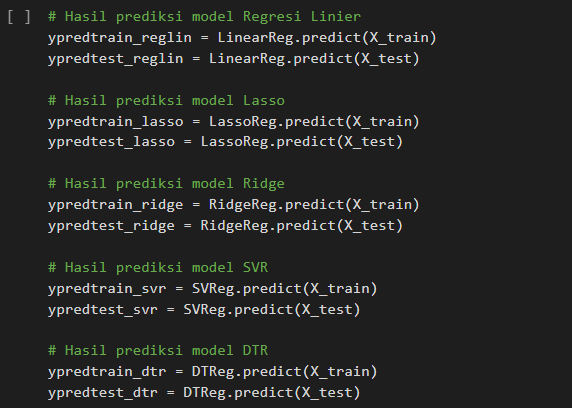

In [26]:
# Tulis di sini
y_predtrain_reglin = Linear.predict(x_train)
y_predtest_reglin = Linear.predict(x_test)

y_predtrain_lasso = Lasso.predict(x_train)
y_predtest_lasso = Lasso.predict(x_test)

y_predtrain_Ridge = Ridge.predict(x_train)
y_predtest_Ridge = Ridge.predict(x_test)

y_predtrain_svr=SVR.predict(x_train)
y_predtest_svr=SVR.predict(x_test)

y_predtrain_dtr=DTR.predict(x_train)
y_predtest_dtr=DTR.predict(x_test)

Evaluasi pertama dilakukan menggunakan metric MSE.

Bandingkan:
- label training data (y_train) dengan hasil prediksi training data (y pred train)
- label testing data (y_test) dengan hasil prediksi testing data (y pred test)

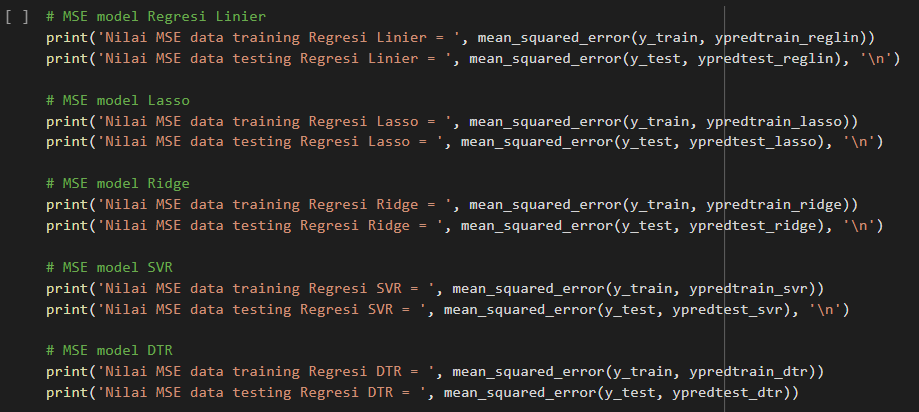

In [34]:
# Tulis di sini
print('Nilai MSE data training Regresi Lasso',mean_squared_error(y_train ,y_predtrain_lasso))
print('Nilai MSE data testing Regresi Lasso',mean_squared_error(y_test ,y_predtest_lasso))

print('Nilai MSE data training Regresi Linear',mean_squared_error(y_train ,y_predtrain_reglin))
print('Nilai MSE data testing Regresi Linear',mean_squared_error(y_test ,y_predtest_reglin))

print('Nilai MSE data training Regresi Ridge',mean_squared_error(y_train ,y_predtrain_Ridge))
print('Nilai MSE data testing Regresi Ridge',mean_squared_error(y_test ,y_predtest_Ridge))

print('Nilai MSE data training Regresi SVR',mean_squared_error(y_train ,y_predtrain_svr))
print('Nilai MSE data testing Regresi SVR',mean_squared_error(y_test ,y_predtest_svr))

print('Nilai MSE data training Regresi DTR',mean_squared_error(y_train ,y_predtrain_dtr))
print('Nilai MSE data testing Regresi  DTR',mean_squared_error(y_test ,y_predtest_dtr))

Nilai MSE data training Regresi Lasso 51040616225.03679
Nilai MSE data testing Regresi Lasso 32881775271.07427
Nilai MSE data training Regresi Linear 51040616225.03679
Nilai MSE data testing Regresi Linear 32881775262.15838
Nilai MSE data training Regresi Ridge 51040616225.0368
Nilai MSE data testing Regresi Ridge 32881775254.902454
Nilai MSE data training Regresi SVR 113673471256.08711
Nilai MSE data testing Regresi SVR 37393496977.231895
Nilai MSE data training Regresi DTR 455625000.0
Nilai MSE data testing Regresi  DTR 40958648000.0


Hasil evaluasi MSE menunjukkan bahwa:


Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 51040616225.03679 | 32881775262.15838 | -
Regresi Lasso | 51040616225.0368 | 32881775271.07428 | -
Regresi Ridge | 32881775271.07428 | 32881775254.902466 | -
SVR | 113673471256.08711 | 37393496977.231895 | Overfit
DTR | 455625000.0 | 40958648000.0 | Goodfit

Model DTR merupakan model terbaik karena MSE training dan testing tidak jauh berbeda.

> **Note**: Regresi Linier, Lasso, dan Ridge memiliki MSE training yang lebih tinggi dibanding MSE testing. Hal ini bisa terjadi karena data kita berjumlah sedikit. Salah satu solusinya adalah dengan menambah jumlah data dalam dataset.

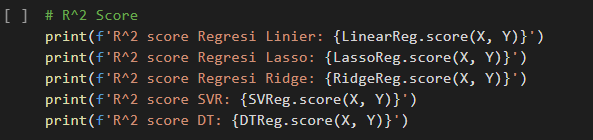

In [39]:
# Tulis di sini
print(f'R^2 score Regresi Liniar:{Linear.score(x,y)}')
print(f'R^2 score Regresi Lasso:{Lasso.score(x,y)}')
print(f'R^2 score Regresi Ridge:{Ridge.score(x,y)}')
print(f'R^2 score SVR:{SVR.score(x,y)}')
print(f'R^2 score DTR:{DTR.score(x,y)}')


R^2 score Regresi Liniar:0.48353037146199596
R^2 score Regresi Lasso:0.48353037144257016
R^2 score Regresi Ridge:0.4835303714778053
R^2 score SVR:-0.07215508470730314
R^2 score DTR:0.906788861012355


Pilih model dengan R^2 score mendekati 1.

Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

## Visualisasi Hasil Prediksi dengan Data Sebenarnya

Visualisasikan perbandingan antara label testing data (y_test) dengan hasil prediksi testing data (y pred test) pada setiap model.

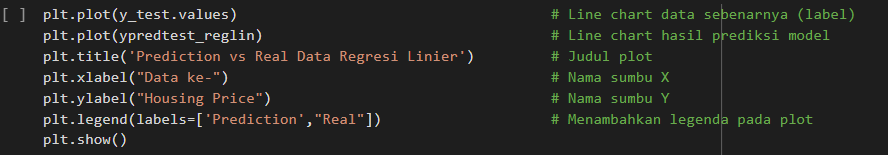

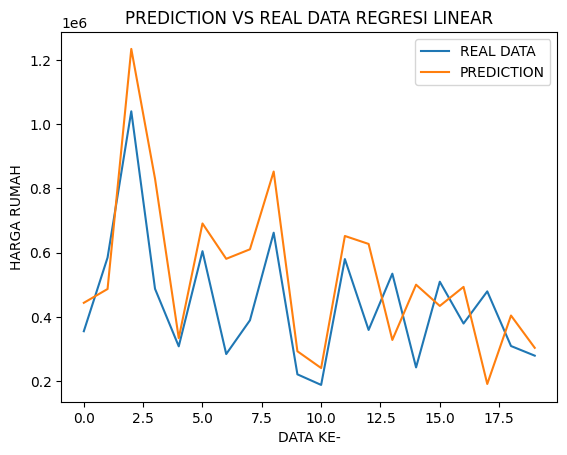

In [41]:

# Tulis di sini
plt.plot(y_test.values)
plt.plot(y_predtest_reglin)
plt.title("PREDICTION VS REAL DATA REGRESI LINEAR")
plt.xlabel("DATA KE-")
plt.ylabel("HARGA RUMAH")
plt.legend(labels=["REAL DATA", "PREDICTION"])
plt.show()

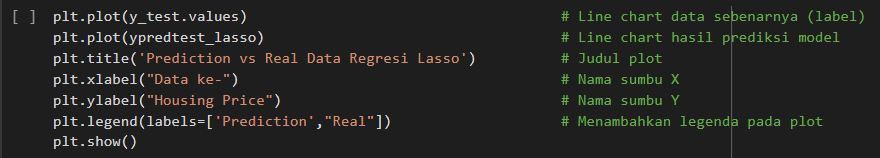

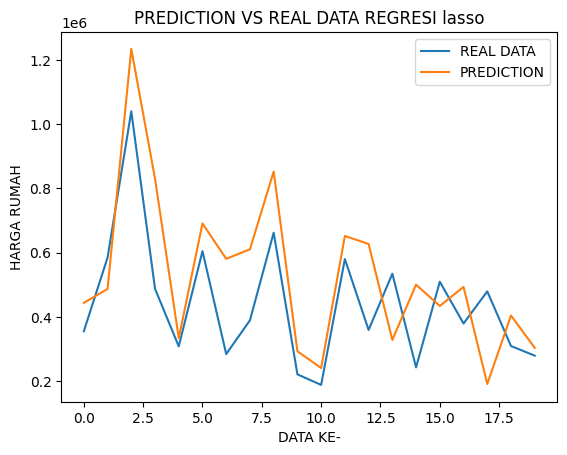

In [44]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(y_predtest_lasso)
plt.title("PREDICTION VS REAL DATA REGRESI lasso")
plt.xlabel("DATA KE-")
plt.ylabel("HARGA RUMAH")
plt.legend(labels=["REAL DATA", "PREDICTION"])
plt.show()

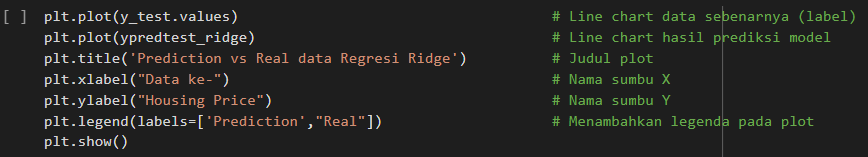

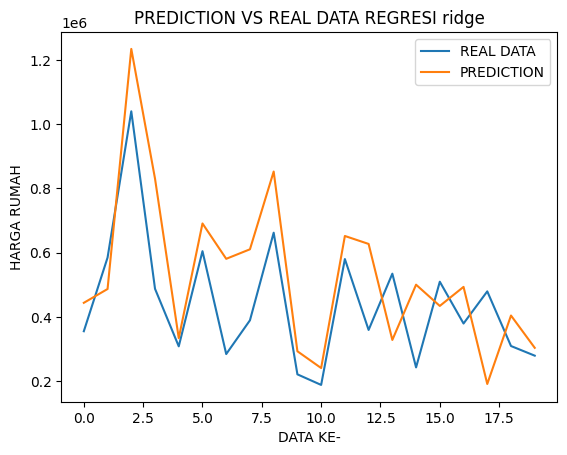

In [45]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(y_predtest_Ridge)
plt.title("PREDICTION VS REAL DATA REGRESI ridge")
plt.xlabel("DATA KE-")
plt.ylabel("HARGA RUMAH")
plt.legend(labels=["REAL DATA", "PREDICTION"])
plt.show()

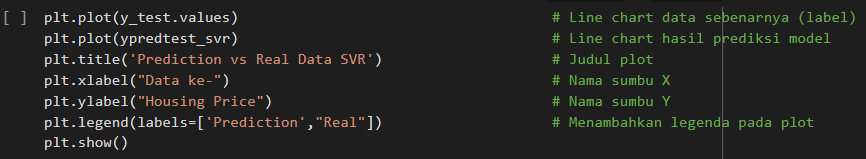

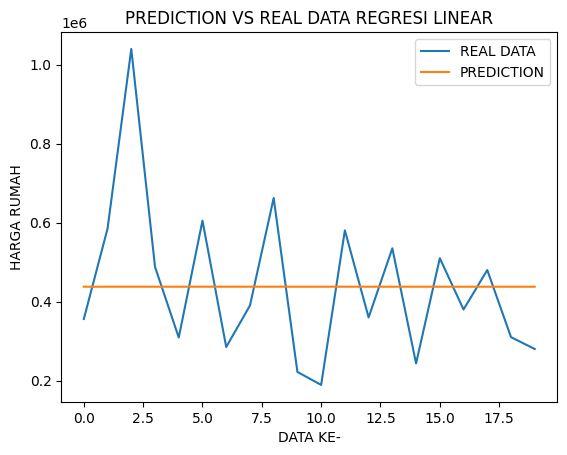

In [46]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(y_predtest_svr)
plt.title("PREDICTION VS REAL DATA REGRESI LINEAR")
plt.xlabel("DATA KE-")
plt.ylabel("HARGA RUMAH")
plt.legend(labels=["REAL DATA", "PREDICTION"])
plt.show()

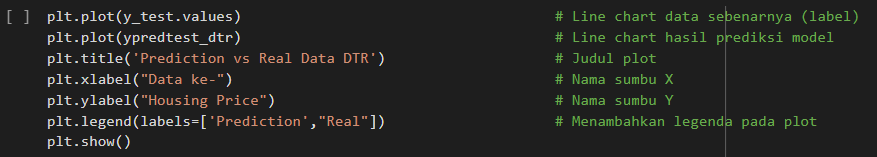

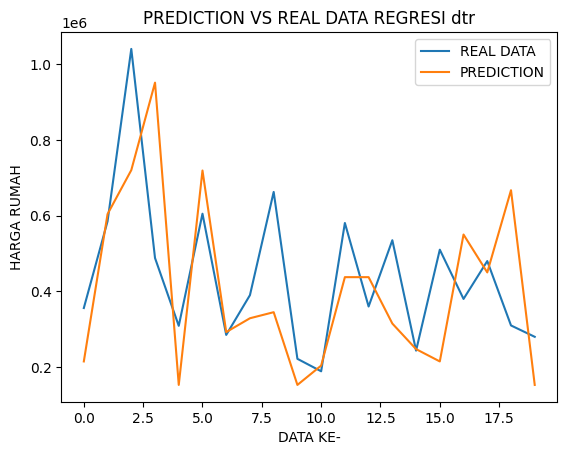

In [47]:
# Tulis di sini
plt.plot(y_test.values)
plt.plot(y_predtest_dtr)
plt.title("PREDICTION VS REAL DATA REGRESI dtr")
plt.xlabel("DATA KE-")
plt.ylabel("HARGA RUMAH")
plt.legend(labels=["REAL DATA", "PREDICTION"])
plt.show()

# Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

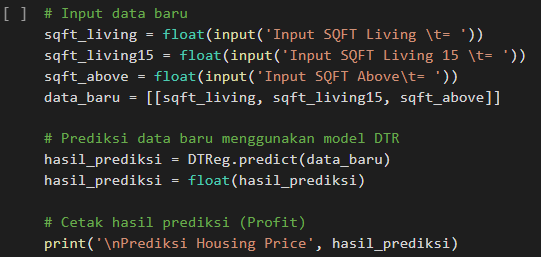

In [50]:
# Tulis di sini
sqft_living=float(input('INPUT sqft_living\t'))
sqft_living15=float(input('INPUT sqft_living 15\t'))
sqft_above=float(input('INPUT sqft above\t'))
data_baru=[[sqft_living,sqft_living15,sqft_above]]

#prediksi data baru menggunakan model dtr
hasil_prediksi=DTR.predict(data_baru)
hasil_prediksi=float(hasil_prediksi)
print('Hasil prediksi harga rumah adalah',hasil_prediksi)

INPUT sqft_living	9.0
INPUT sqft_living 15	3.4
INPUT sqft above	3.4
Hasil prediksi harga rumah adalah 450000.0


# Exercise (Latihan)

1. Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

2. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
3. Evaluasi setiap model!
4. Tentukan dan jelaskan model yang paling baik!

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')
# 1 # download data
!wget -O house_price.csv https://drive.usercontent.google.com/u/0/uc?id=1ir-ilrC_m4XAny9tklloJc52oLITjUGy&export=download
df=pd.read_csv('house_price.csv')
df.head()
df.corr()

# menentukan setiap pembagian dataset
x=df.iloc[:,:-1]
y=df.iloc[:,-1]  # membagi testing 20% dan training 80%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 2 # membuat 5 model pembelajaran mesin
linear= LinearRegression().fit(x_train,y_train)
lasso= Lasso(alpha=0.1).fit(x_train,y_train)
ridge= Ridge(alpha=0.1).fit(x_train,y_train)
sVR= SVR().fit(x_train,y_train)
dTR= DecisionTreeRegressor(random_state=47).fit(x_train,y_train)

predtrain_reglin = linear.predict(x_train)
predtest_reglin = linear.predict(x_test)

predtrain_lasso = lasso.predict(x_train)
predtest_lasso = lasso.predict(x_test)

predtrain_Ridge = ridge.predict(x_train)
predtest_Ridge = ridge.predict(x_test)

predtrain_svr=sVR.predict(x_train)
predtest_svr=sVR.predict(x_test)

predtrain_dtr=dTR.predict(x_train)
predtest_dtr=dTR.predict(x_test)

# 3 # evaluasi setiap model menggunakan mse

#lasso adalah model terendah dalam pengujian menunjukkan model terbaik dalam hal generalisasi untuk data pengujian.
print(' data training Regresi Lasso',mean_squared_error(y_train ,predtrain_lasso))
print(' data testing Regresi Lasso',mean_squared_error(y_test ,predtest_lasso),'\n')

print(' data training Regresi Linear',mean_squared_error(y_train ,predtrain_reglin))
print(' data testing Regresi Linear',mean_squared_error(y_test ,predtest_reglin),'\n')

print(' data training Regresi Ridge',mean_squared_error(y_train ,predtrain_Ridge))
print(' data testing Regresi Ridge',mean_squared_error(y_test ,predtest_Ridge),'\n')

print(' data training Regresi SVR',mean_squared_error(y_train ,predtrain_svr))
print(' data testing Regresi SVR',mean_squared_error(y_test ,predtest_svr),'\n')

# DTR adalah model terburuk dengan nilai yang jauh lebih tinggi pada data testing, model tersebut tidak dapat diandalkan.
print(' data training Regresi DTR',mean_squared_error(y_train ,predtrain_dtr))
print(' data testing Regresi  DTR',mean_squared_error(y_test ,predtest_dtr),'\n')


# 4 # penjelasan
print("""yang terbaik ada pada regresi "lasso" karna data label
target train dan testing lebih rendah di bandngkan data lainnya\n
data yang terburuk ada pada DTR karna model telah overfitting pada data training""")

--2024-10-02 17:51:43--  https://drive.usercontent.google.com/u/0/uc?id=1ir-ilrC_m4XAny9tklloJc52oLITjUGy
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1ir-ilrC_m4XAny9tklloJc52oLITjUGy [following]
--2024-10-02 17:51:43--  https://drive.usercontent.google.com/uc?id=1ir-ilrC_m4XAny9tklloJc52oLITjUGy
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ir-ilrC_m4XAny9tklloJc52oLITjUGy [following]
--2024-10-02 17:51:43--  https://drive.usercontent.google.com/download?id=1ir-ilrC_m4XAny9tklloJc52oLITjUGy
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaitin